<a href="https://colab.research.google.com/github/FG-SC/Monte-Carlo-simulation-for-Bitcoin/blob/master/MCS_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

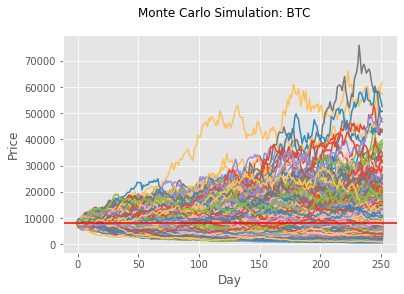

In [2]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
#Dados de início e fim da série histórica
start = dt.datetime(2017, 1, 3)
end = dt.datetime(2017, 11, 20)

#Consulta de preços no yahoo, com retornos diários em %
prices = web.DataReader('BTC-USD', 'yahoo', start, end)['Close']
returns = prices.pct_change()
last_price = prices[-1]

#Numero de simulações
num_simulations = 1000
num_days = 252

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    price_series = []
    price = last_price * (1 + np.random.normal(0, daily_vol))    #mi=0,s=daily_v
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
    
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: BTC')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()